In [16]:
#Importing signal data to Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

signal_data = pd.read_csv('E:/Frankfurt University of Applied Sciences/Individual Project/Machine Learning/Raw_Data/adc_70.txt',delimiter='\t', header = None)
signal_data

,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768,1,1,512,0,1953125,12,0.0,0,...,15,14,7,1,-2,-3,-7,-10,-14,-19
1,64,32768,1,1,512,0,1953125,12,0.0,0,...,38,40,34,34,30,27,22,20,12,10
2,64,32768,1,1,512,0,1953125,12,0.0,0,...,22,19,18,12,5,8,2,-1,-8,-13
3,64,32768,1,1,512,0,1953125,12,0.0,0,...,2,-3,-4,-14,-15,-18,-22,-25,-26,-29
4,64,32768,1,1,512,0,1953125,12,0.0,0,...,-18,-23,-28,-27,-28,-31,-30,-25,-23,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,64,32768,1,1,512,0,1953125,12,0.0,0,...,-25,-27,-25,-27,-28,-26,-22,-20,-20,-18
196,64,32768,1,1,512,0,1953125,12,0.0,0,...,27,21,20,19,14,10,7,-1,-5,-11
197,64,32768,1,1,512,0,1953125,12,0.0,0,...,13,14,18,26,27,27,28,30,32,34
198,64,32768,1,1,512,0,1953125,12,0.0,0,...,-23,-23,-24,-28,-28,-32,-28,-34,-35,-33


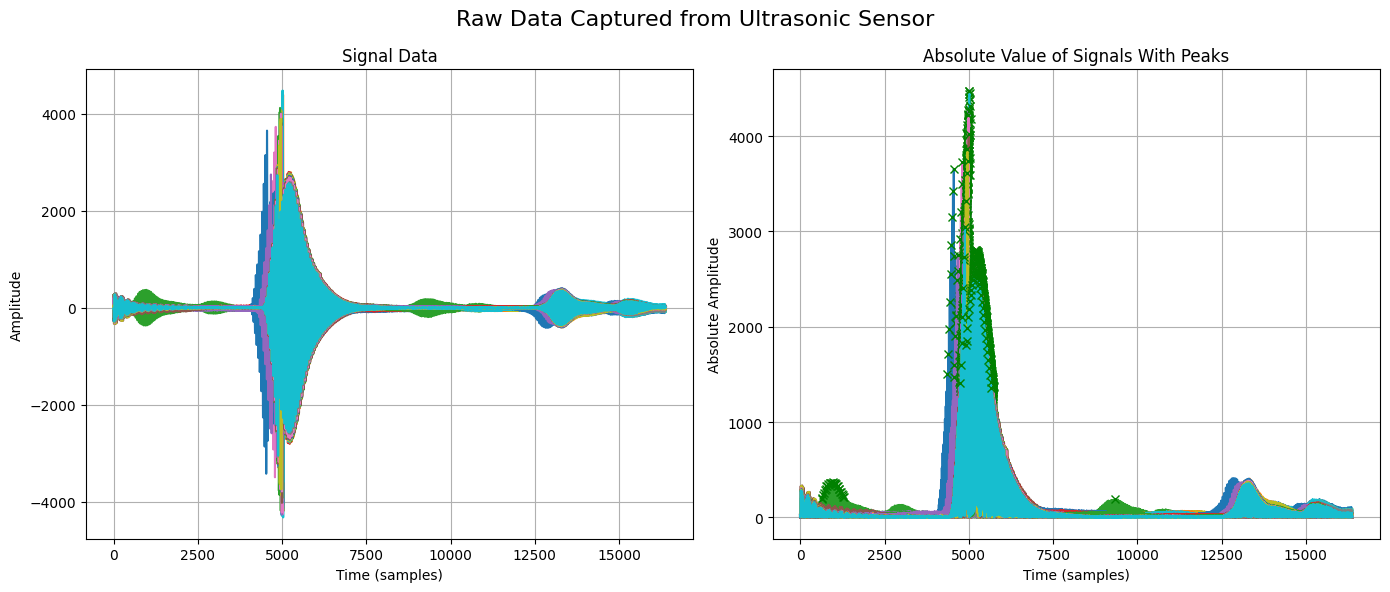

In [17]:
from scipy.signal import find_peaks

df = pd.DataFrame(signal_data)
signal_dictionary = []

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot all the signals
for i in range(df.shape[0]):
    # Ignoring the first 16 columns
    signal = df.iloc[i].iloc[16:]

    axs[0].plot(signal.values[:])

# Adding labels and title to the first subplot
axs[0].grid(True)
axs[0].set_xlabel('Time (samples)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Signal Data')

# Plot all the signals with absolute values
for i in range(df.shape[0]):
    # Ignoring the first 16 columns
    signal = df.iloc[i].iloc[16:]
    absolute_signal = signal.abs()  # Taking the absolute values

    # Calculate mean and standard deviation of the absolute signal
    mean_signal = np.mean(absolute_signal)
    std_signal = np.std(absolute_signal)

    # Set prominence threshold dynamically based on mean and standard deviation
    prominence_threshold = mean_signal + 3 * std_signal  

    peaks, _ = find_peaks(absolute_signal.values[:], prominence=prominence_threshold)

    key = f'S{i+1}'
    signal_dictionary.append((key, absolute_signal, peaks))

    axs[1].plot(absolute_signal.values[:])
    axs[1].plot(peaks, absolute_signal.values[:][peaks], 'x', color='green')  # Plotting the peaks for visualization

# Adding labels and title to the second subplot
axs[1].grid(True)
axs[1].set_xlabel('Time (samples)')
axs[1].set_ylabel('Absolute Amplitude')
axs[1].set_title('Absolute Value of Signals With Peaks')

# Add a main title
fig.suptitle('Raw Data Captured from Ultrasonic Sensor', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Initialising the signal list dictionary where the updated signal data will be stored with real annotated peak
updated_signal_dictionary = []

# Function to plot the signal with peaks
# Used to annotate the real peak value in the signal data
def annotate_real_peaks():
    for key, signal, peaks in signal_dictionary:
        peak_values = signal.values[peaks]
        median_peak = np.median(peak_values)
        median_std = np.std(peak_values)

        #Calculate threshold multiplier k based on Z-score
        z_scores = (peak_values - median_peak) / median_std
        k = np.median(np.abs(z_scores))  # Use the average absolute Z-score as k

        threshold = median_peak + k * median_std

        # Filter peaks based on threshold
        filtered_peaks = [peak for peak in peak_values if peak <= threshold]

        print("Top Peaks in signal", key, ":", peak_values)
        print("Real peak value for signal", key, ":", median_peak)
        print("Median Std for signal", key, ":", median_std)
        print("Threshold for signal", key, ":", threshold)

        updated_signal_dictionary.append((key, signal, peaks, median_peak, median_std, threshold, filtered_peaks))
    return None

annotate_real_peaks()


Top Peaks in signal S1 : [1309 1493 1707 1955 2231 2537 2823 3108 3373 3612 3815 2141 2089 2144
 2202 2257 2291 2332 2356 2375 2367 2349 2324 2303 2252 2210 2152 2085
 2020 1943 1870 1809 1734 1665 1588 1516 1441 1372 1308]
Real peak value for signal S1 : 2152
Median Std for signal S1 : 573.2554680852838
Threshold for signal S1 : 2367.0
Top Peaks in signal S2 : [1399 1607 1846 2105 2383 2659 2920 3179 3396 2645 1886 1966 2020 2071
 2118 2153 2192 2216 2227 2228 2216 2199 2156 2122 2070 2025 1964 1904
 1826 1761 1699 1631 1559 1485 1419 1358 1278]
Real peak value for signal S2 : 2070
Median Std for signal S2 : 466.9235417754542
Threshold for signal S2 : 2254.0
Top Peaks in signal S3 : [1223 1398 1604 1834 2104 2381 2657 2931 3188 3403 3593 2117 1973 2029
 2086 2132 2173 2208 2238 2242 2244 2231 2209 2174 2140 2095 2033 1981
 1911 1848 1778 1715 1640 1576 1501 1439 1362 1293]
Real peak value for signal S3 : 2090
Median Std for signal S3 : 531.1272233879777
Threshold for signal S3 : 2300.

In [19]:
# Print all the signals with real peak values

print(updated_signal_dictionary)

[('S1', 16        21
17        23
18        24
19       103
20       144
        ... 
16395      3
16396      7
16397     10
16398     14
16399     19
Name: 0, Length: 16384, dtype: object, array([4755, 4779, 4804, 4828, 4851, 4875, 4899, 4923, 4947, 4970, 4994,
       5018, 5042, 5066, 5090, 5114, 5138, 5162, 5186, 5210, 5234, 5257,
       5281, 5305, 5329, 5353, 5377, 5400, 5424, 5448, 5472, 5496, 5520,
       5543, 5567, 5591, 5614, 5638, 5662], dtype=int64), 2152, 573.2554680852838, 2367.0, [1309, 1493, 1707, 1955, 2231, 2141, 2089, 2144, 2202, 2257, 2291, 2332, 2356, 2367, 2349, 2324, 2303, 2252, 2210, 2152, 2085, 2020, 1943, 1870, 1809, 1734, 1665, 1588, 1516, 1441, 1372, 1308]), ('S2', 16       10
17        9
18        3
19       42
20        9
         ..
16395    27
16396    22
16397    20
16398    12
16399    10
Name: 1, Length: 16384, dtype: object, array([4783, 4807, 4831, 4855, 4879, 4903, 4926, 4950, 4974, 4994, 5022,
       5046, 5069, 5093, 5117, 5141, 5166, 5189, 5213,

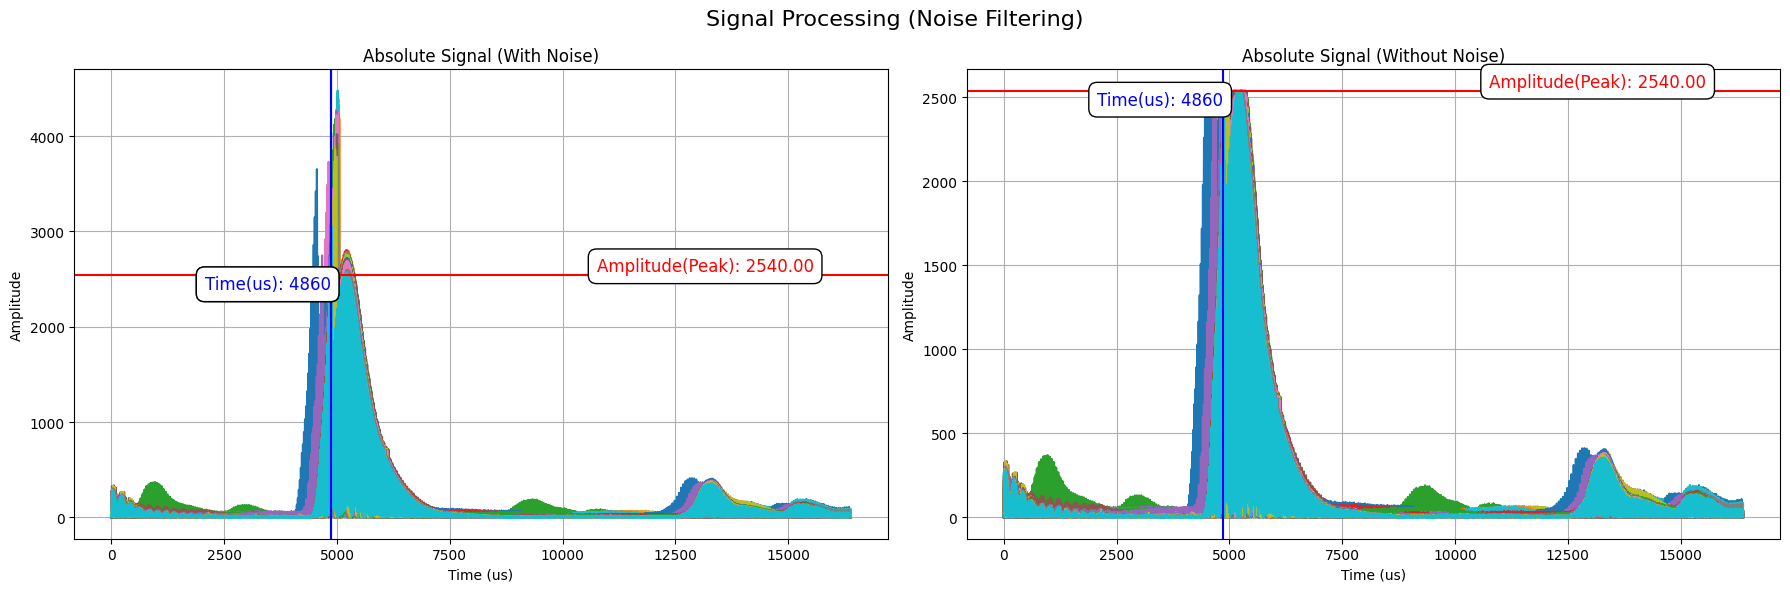

In [20]:
import matplotlib.pyplot as plt

# Extract all threshold values from updated_signal_dictionary
threshold_values = [element[5] for element in updated_signal_dictionary]  # Assuming threshold is stored at index 5

# Calculate the overall threshold as the median of all threshold values
overall_threshold = np.median(threshold_values)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot total signal with overall threshold line
for key, signal, peaks, median_peak, median_std, threshold, filtered_peaks in updated_signal_dictionary:
    axs[0].plot(signal.values, label=f'Signal {key}')

axs[0].axhline(y=overall_threshold, color='red', linestyle='-', label=f'Amplitude(Peak): {overall_threshold:.2f}')
axs[0].text(len(signal) - len(signal) // 20, overall_threshold + 0.05, f'Amplitude(Peak): {overall_threshold:.2f}', color='red', fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Find the time index corresponding to the overall_threshold
overall_threshold_index = np.argmax(signal.values > overall_threshold)
# Annotate x-axis line with corresponding value
axs[0].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[0].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[0].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[0].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

axs[0].set_xlabel('Time (us)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Absolute Signal (With Noise)')
axs[0].grid(True)

# Plot total signal with values above the overall threshold eliminated
for key, signal, peaks, median_peak, median_std, threshold, filtered_peaks in updated_signal_dictionary:
    filtered_signal = signal.copy()
    filtered_signal[filtered_signal > overall_threshold] = 0
    axs[1].plot(filtered_signal.values, label=f'Signal {key}')

axs[1].axhline(y=overall_threshold, color='red', linestyle='-', label=f'Amplitude(Peak): {overall_threshold:.2f}')
axs[1].text(len(signal) - len(signal) // 20, overall_threshold + 0.05, f'Amplitude(Peak): {overall_threshold:.2f}', color='red', fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Annotate x-axis line with corresponding value
axs[1].axvline(x=overall_threshold_index, color='blue', linestyle='-', label=f'Time(us): {overall_threshold_index}')
axs[1].text(overall_threshold_index, overall_threshold - 0.05, f'Time(us): {overall_threshold_index}', color='blue', fontsize=12, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
axs[1].set_xlabel('Time (us)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Absolute Signal (Without Noise)')
axs[1].grid(True)

# Add a main title
fig.suptitle('Signal Processing (Noise Filtering)', fontsize=16)

plt.tight_layout()
plt.show()


In [21]:
# Extract all threshold values from updated_signal_dictionary
threshold_values = [element[5] for element in updated_signal_dictionary]  # Assuming threshold is stored at index 5

# Calculate the overall threshold as the median of all threshold values
overall_threshold = np.median(threshold_values)

# Find the time index corresponding to the overall_threshold
overall_threshold_index = np.argmax(signal.values > overall_threshold)

# Create a new list to hold the updated signals
updated_signals = []

# Iterate over the updated_signal_dictionary and filter the signals
for key, signal, peaks, median_peak, median_std, threshold, filtered_peaks in updated_signal_dictionary:
    filtered_signal = signal.copy()
    filtered_signal[filtered_signal > overall_threshold] = 0
    updated_signals.append((key, filtered_signal, peaks, median_peak, median_std, threshold, filtered_peaks))

# Assign the updated_signals list to updated_signal_dictionary
updated_signal_dictionary = updated_signals


In [22]:
print(updated_signal_dictionary)

[('S1', 16        21
17        23
18        24
19       103
20       144
        ... 
16395      3
16396      7
16397     10
16398     14
16399     19
Name: 0, Length: 16384, dtype: object, array([4755, 4779, 4804, 4828, 4851, 4875, 4899, 4923, 4947, 4970, 4994,
       5018, 5042, 5066, 5090, 5114, 5138, 5162, 5186, 5210, 5234, 5257,
       5281, 5305, 5329, 5353, 5377, 5400, 5424, 5448, 5472, 5496, 5520,
       5543, 5567, 5591, 5614, 5638, 5662], dtype=int64), 2152, 573.2554680852838, 2367.0, [1309, 1493, 1707, 1955, 2231, 2141, 2089, 2144, 2202, 2257, 2291, 2332, 2356, 2367, 2349, 2324, 2303, 2252, 2210, 2152, 2085, 2020, 1943, 1870, 1809, 1734, 1665, 1588, 1516, 1441, 1372, 1308]), ('S2', 16       10
17        9
18        3
19       42
20        9
         ..
16395    27
16396    22
16397    20
16398    12
16399    10
Name: 1, Length: 16384, dtype: object, array([4783, 4807, 4831, 4855, 4879, 4903, 4926, 4950, 4974, 4994, 5022,
       5046, 5069, 5093, 5117, 5141, 5166, 5189, 5213,

In [23]:
# Initialising the list to store the selected windows with peaks
selected_peak_windows = []

# Looping through updated_signal_dictionary to get the signal data and real peak values
for i, element in enumerate(updated_signal_dictionary):
    # Access key, filtered_signal, peaks, median_peak, median_std, threshold, and filtered_peaks
    key = element[0]  # Assuming key is the first element
    filtered_signal = element[1]  # Assuming filtered_signal is the second element (Pandas Series)
    peaks = element[2]  # Assuming peaks are the third element
    median_peak = element[3]  # Median peak value
    median_std = element[4]  # Median standard deviation
    threshold = element[5]  # Threshold value
    filtered_peaks = element[6]  # Peaks filtered by threshold

    # Determine the window size dynamically based on the distances between consecutive peaks,
    # median peak, median std, and threshold
    if len(peaks) > 1:
        window_size = np.min(np.diff(peaks))  # Use the minimum distance between consecutive peaks
    else:
        window_size = len(filtered_signal)  # Use the entire length of the signal if only one peak is detected

    # Optionally, you can adjust the window size based on median peak, median std, and threshold
    window_size *= 2  # Adjust the multiplier as needed

    # Loop through signal in steps of window_size
    for k in range(0, len(filtered_signal), window_size):
        window = filtered_signal.iloc[k:k + window_size]  # Use iloc for integer-based indexing
        if median_peak in window.values:  # Check if median_peak in window values
            selected_peak_windows.append(window)  # Append window to selected_peak_windows



In [24]:
# Print the selected windows
if selected_peak_windows:
  print("Selected window:")
  for window in selected_peak_windows:
    # Assuming window is a NumPy array
    print(f"Window: {window}")  # Prints the content of window
else:
  print("No windows found containing the real peak.")

Selected window:
Window: 5352    1396
5353    1155
5354     889
5355     612
5356     325
5357      31
5358     256
5359     544
5360     879
5361    1127
5362    1360
5363    1574
5364    1755
5365    1918
5366    2044
5367    2137
5368    2192
5369    2210
5370    2188
5371    2133
5372    2042
5373    1912
5374    1749
5375    1555
5376    1332
5377    1090
5378     831
5379     558
5380     276
5381      15
5382     300
5383     631
5384     884
5385    1124
5386    1349
5387    1551
5388    1729
5389    1879
5390    2001
5391    2080
5392    2133
5393    2152
5394    2126
5395    2064
5396    1968
5397    1841
Name: 0, dtype: object
Window: 5096     385
5097     120
5098     150
5099     446
5100     738
5101     968
5102    1189
5103    1392
5104    1569
5105    1725
5106    1864
5107    1967
5108    2039
5109    2071
5110    2070
5111    2033
5112    1963
5113    1856
5114    1716
5115    1551
5116    1359
5117    1141
5118     905
5119     653
5120     394
5121     118
5122    

In [25]:
# Constants
ADC_MAX_SAMPLE_FREQUENCY = 125000000  # Hz
ADC_SAMPLE_DECIMATION = 64
ADC_SAMPLE_FREQUENCY = ADC_MAX_SAMPLE_FREQUENCY / ADC_SAMPLE_DECIMATION  # Hz
num_samples_per_window = 300  # Adjust as needed

# Calculate the duration of each window
duration_per_sample = 1 / ADC_SAMPLE_FREQUENCY  # Duration of each sample in seconds
duration_per_window = num_samples_per_window * duration_per_sample  # Duration of each window in seconds

print("Duration per window:", duration_per_window, "seconds")

Duration per window: 0.00015360000000000002 seconds


In [26]:
import os 
import datetime

# Specify the folder path to save the images
folder_path = 'E:\\Frankfurt University of Applied Sciences\\Individual Project\\Machine Learning\\peak_spectrogram1'


# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Calculate the duration per window
duration_per_window = num_samples_per_window * duration_per_sample  # Duration of each window in seconds

# Loop through the selected peak windows
# Plot the spectrogram and save the image to the folder
# We are saving the spectrogram images with 300x300 pixels size and grayscale colormap
# This will later be used for training our model
# We are also adding a timestamp to the filename to make it unique
 
for i, window in enumerate(selected_peak_windows):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.specgram(window, Fs=ADC_SAMPLE_FREQUENCY, mode='psd', scale='dB', cmap='gray')

    # Set labels and title
    ax.set_xlabel('Time (seconds)')  # Update the x-axis label to show time in seconds
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram')

    # Set the x-axis limits to reflect the duration per window
    ax.set_xlim(0, duration_per_window)

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    try:
        # Get the key, median peak, median std, and threshold of the current window
        key = updated_signal_dictionary[i][0]
        median_peak = updated_signal_dictionary[i][3]
        median_std = updated_signal_dictionary[i][4]
        threshold = updated_signal_dictionary[i][5]
        
        # Generate a unique filename incorporating window index, key, and timestamp
        filename = f'spectrogram_{i}_{key}_{median_peak:.2f}_{median_std:.2f}_{threshold:.2f}_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.png'
    except IndexError:
        # Handle IndexError if the index exceeds the length of updated_signal_dictionary
        filename = f'spectrogram_{i}_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.png'
    
    # Save the spectrogram image to the folder with the unique filename
    save_path = os.path.join(folder_path, filename)
    plt.savefig(save_path)
    plt.close()  # Close the figure to free up memory


C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\3457804712.py:23: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=46).
  ax.specgram(window, Fs=ADC_SAMPLE_FREQUENCY, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\3457804712.py:23: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  ax.specgram(window, Fs=ADC_SAMPLE_FREQUENCY, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\3457804712.py:23: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=38).
  ax.specgram(window, Fs=ADC_SAMPLE_FREQUENCY, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\3457804712.py:23: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=42).
  ax.specgram(window, Fs=ADC_SAMPLE_FREQUENCY, mode='psd', scale='dB', cmap='gray')
C:\Users\gau

In [27]:
import os
import datetime

ADC_MAX_SAMPLE_FREQUENCY = 125000000  # Hz
ADC_SAMPLE_DECIMATION = 64

effective_sampling_frequency = ADC_MAX_SAMPLE_FREQUENCY / ADC_SAMPLE_DECIMATION
# Create a folder to save spectrogram images if it doesn't exist
folder_path = 'E:\\Frankfurt University of Applied Sciences\\Individual Project\\Machine Learning\\peak_spectrogram2'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Loop through selected_peak_windows
for i, window in enumerate(selected_peak_windows):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot spectrogram
    ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
    
    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram')

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    # Get the current date and time
    now = datetime.datetime.now()

    # Format the date and time as a string
    timestamp = now.strftime("%Y%m%d_%H%M%S")

    # Save the spectrogram image to the folder with a unique filename
    filename = f'spectrogram_{i}_{timestamp}.png'
    save_path = os.path.join(folder_path, filename)
    plt.savefig(save_path)
    
    # Close the figure to avoid memory leaks
    plt.close(fig)

print("Spectrogram images saved successfully.")

C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\2112629203.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=46).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\2112629203.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\2112629203.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=38).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\2112629203.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=42).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale

Spectrogram images saved successfully.


In [28]:
import random

# Initialising the list to store the selected windows with peaks
selected_non_peak_windows = []

# Looping through updated_signal_dictionary to get the signal data and real peak values
for i, element in enumerate(updated_signal_dictionary):
    # Access key, filtered_signal, peaks, median_peak, median_std, threshold, and filtered_peaks
    key = element[0]  # Assuming key is the first element
    filtered_signal = element[1]  # Assuming filtered_signal is the second element (Pandas Series)
    peaks = element[2]  # Assuming peaks are the third element
    median_peak = element[3]  # Median peak value
    median_std = element[4]  # Median standard deviation
    threshold = element[5]  # Threshold value
    filtered_peaks = element[6]  # Peaks filtered by threshold

    # Determine the window size dynamically based on the distances between consecutive peaks,
    # median peak, median std, and threshold
    if len(peaks) > 1:
        window_size = np.min(np.diff(peaks))  # Use the minimum distance between consecutive peaks
    else:
        window_size = len(filtered_signal)  # Use the entire length of the signal if only one peak is detected

    # Optionally, you can adjust the window size based on median peak, median std, and threshold
    window_size *= 2  # Adjust the multiplier as needed

    # Create a list to store the windows without the peak
    windows_without_peak = []

    # Loop through signal in steps of window_size
    for k in range(0, len(filtered_signal), window_size):
        window = filtered_signal.iloc[k:k + window_size]  # Use iloc for integer-based indexing
        if median_peak not in window.values:   # Check if the median_peak is not present in the window
            windows_without_peak.append(window)  # Append window to selected_peak_windows

    # Select a random window from the windows_without_peak list
    selected_window = random.choice(windows_without_peak)
    
    selected_non_peak_windows.append(selected_window)  # Append the selected window to selected_non_peak_windows



In [29]:
# Print the selected windows
if selected_non_peak_windows:
  print("Selected window:")
  for window in selected_non_peak_windows:
    # Assuming window is a NumPy array
    print(f"Window: {window}")  # Prints the content of window
else:
  print("No window selected.")


Selected window:
Window: 3098     9
3099    14
3100    12
3101     6
3102     4
3103     2
3104     3
3105     2
3106     2
3107     4
3108     1
3109     5
3110     7
3111     6
3112     4
3113     4
3114     3
3115     7
3116    13
3117     9
3118     3
3119     4
3120     2
3121     1
3122     1
3123     3
3124     3
3125     6
3126     3
3127     1
3128     2
3129     1
3130     0
3131     4
3132     2
3133     2
3134     1
3135     1
3136     5
3137     3
3138     1
3139     1
3140     1
3141     4
3142    10
3143    10
Name: 0, dtype: object
Window: 9216    1
9217    1
9218    1
9219    2
9220    6
9221    5
9222    5
9223    2
9224    1
9225    0
9226    1
9227    7
9228    7
9229    7
9230    7
9231    5
9232    6
9233    9
9234    6
9235    6
9236    2
9237    1
9238    1
9239    4
9240    2
9241    5
9242    7
9243    5
9244    3
9245    6
9246    1
9247    2
9248    3
9249    4
9250    6
9251    6
9252    5
9253    4
9254    5
9255    1
Name: 1, dtype: object
Window: 5490   

In [30]:
import os
import datetime

ADC_MAX_SAMPLE_FREQUENCY = 125000000  # Hz
ADC_SAMPLE_DECIMATION = 64

effective_sampling_frequency = ADC_MAX_SAMPLE_FREQUENCY / ADC_SAMPLE_DECIMATION
# Create a folder to save spectrogram images if it doesn't exist
folder_path = 'E:\\Frankfurt University of Applied Sciences\\Individual Project\\Machine Learning\\Non_peak_spectrogram'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Loop through selected_peak_windows
for i, window in enumerate(selected_non_peak_windows):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot spectrogram
    ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
    
    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')
    ax.set_title('Spectrogram')

    # Set the figure size to 300x300
    fig.set_size_inches(3, 3)
    
    # Get the current date and time
    now = datetime.datetime.now()

    # Format the date and time as a string
    timestamp = now.strftime("%Y%m%d_%H%M%S")

    # Save the spectrogram image to the folder with a unique filename
    filename = f'spectrogram_{i}_{timestamp}.png'
    save_path = os.path.join(folder_path, filename)
    plt.savefig(save_path)
    
    # Close the figure to avoid memory leaks
    plt.close(fig)

print("Spectrogram images saved successfully.")

C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\385144785.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=46).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\385144785.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=40).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\385144785.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=38).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB', cmap='gray')
C:\Users\gaura\AppData\Local\Temp\ipykernel_2232\385144785.py:20: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=42).
  ax.specgram(window, Fs=effective_sampling_frequency, mode='psd', scale='dB

Spectrogram images saved successfully.
